<a href="https://colab.research.google.com/github/DD-SQUARED/University_Assignments_CS/blob/main/synthetic_gaussian_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

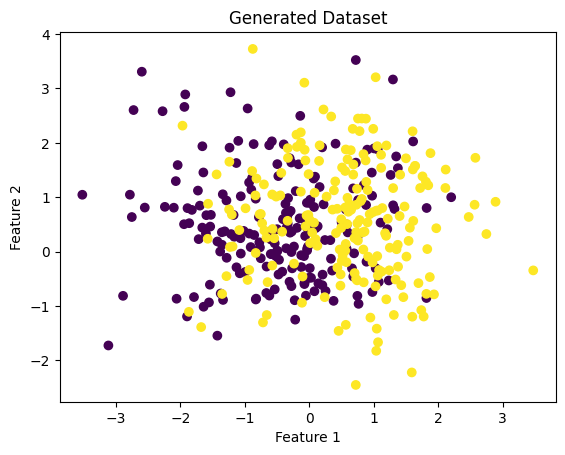

Accuracy: 0.705


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
#31506534 - A Nare
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

N1 = 200
N2 = 200

d = 1.0

sigma1 = 1
sigma2 = 1

x1_center = d / 2 * np.array([-1, 1])
x2_center = d / 2 * np.array([1, 1])

X_T = np.vstack((x1_center, x2_center))

noise1 = np.random.normal(scale=sigma1, size=(N1, 2))
noise2 = np.random.normal(scale=sigma2, size=(N2, 2))

X1 = X_T[0, :] + noise1
X2 = X_T[1, :] + noise2

X = np.concatenate((X1, X2), axis=0)

y = np.array([0] * N1 + [1] * N2)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Generated Dataset")
plt.show()

# Define the number of clusters (should be 2 for this dataset)
n_clusters = 2
# Create a KMeans object with the specified number of clusters
kmeans = KMeans(n_clusters=n_clusters)
# Fit the KMeans model to the data
kmeans.fit(X)

# Get the cluster labels assigned by KMeans
kmeans_labels = kmeans.labels_

aligned_labels = np.zeros_like(kmeans_labels)
for cluster in range(n_clusters):
    mask = (kmeans_labels == cluster)
    aligned_labels[mask] = np.argmax(np.bincount(y[mask]))

# Calculate accuracy
accuracy = np.sum(aligned_labels == y) / len(y)
print("Accuracy:", accuracy)